# <b>IFI 8420 - Assignment 2</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

#### Installing all the requirement packages

In [7]:
import pandas as pd
import csv


import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Downloading HousePrices and Credit CSV data

In [4]:
credit_df = pd.read_csv('Credit.csv')
house_prices_df = pd.read_csv('HousePrices.csv')

print(credit_df.info())
print(house_prices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       546 non-null    float64
 1   lotsize     546 non-

<hr>

### <b>Section 1</b> - HousePrices data set
##### <u>Section Code Split</u>
<ul>
    <li>Mina - </li>
    <li>Carmen - i - iv</li>
    <li>Gaayathri - </li>
    <li>Jonathan - </li>   
</ul>

#### Summary stat for all the variables in the HousePrices data. (<b>i</b>)

#### Percentage of houses in the data with Driveway, Gas-Heat, and Air-conditioning present. (<b>ii</b>)

#### Constructing a linear regression model to test whether number of bedrooms influence house prices + summary of the model. (<b>iii</b>)

#### Constructing a multiple linear regression model and observing the effect on the house prices + summary of the model. (<b>iv</b>)

<hr>

### <b>Section 2</b> - Credit data set part 1
##### <u>Section Code Split</u>
<ul>
    <li>Mina - </li>
    <li>Carmen - A-i until A-ii</li>
    <li>Gaayathri - A-iii until B</li>
    <li>Jonathan - </li>
</ul>

#### Observing the dimension of the Credit data. (<b>A-i</b>)

#### Summary stat for the variables in Credit data. (<b>A-ii</b>)

#### Calculating the percentages of:
<ul>
    <li>Student</li>
    <li>Female</li>
    <li>Student who are Female</li>
</ul>
<h4>in the Credit data. (<b>A-iii</b>)</h4>

#### Constructing a linear regression model to test:
<ul>
    <li>How Credit Rating and Student effect Credit Card Balance</li>
    <li>Whether the effect of Credit Rating on Credit Card Balance is different for students vs. non-students</li>
</ul>
<h4>+ summary of the model. (<b>B</b>)</h4>

<hr>

### <b>Section 3</b> - Credit data set part 2
##### <u>Section Code Split</u>
<ul>
    <li>Mina - </li>
    <li>Carmen - </li>
    <li>Gaayathri - i until iv</li>
    <li>Jonathan - </li>   
</ul>

#### Testing whether Age influence Credit Card Balance on the basis of simple linear regression + summary of the model using the summary() function. (<b>i</b>)

#### Using Age and Credit Rating as predictors of Credit Card Balance (response variable) in a multiple linear regression setting + summary of the model. (<b>ii</b>)

#### Comparing effect of Age from part (i) and (ii) _in Pythoncode_. (<b>iii</b>)

#### Observing the distribution of Age and constructing 3 dummy variables based on it:
<ol>
    <li>Age 40 and below (Age≤40)</li>
    <li>Age Between 41 to 56 (41≤Age≤56)</li>
    <li>Age group over 56 (Age>56)</li>
</ol>
<h4>in the Credit data. (<b>iv</b>)</h4>

<hr>

### <b>Section 4</b> - S&P 500 price data and NVIDIA stock
##### <u>Section Code Split</u>
<ul>
    <li>Mina - i - vi</li>
    <li>Carmen - </li>
    <li>Gaayathri - </li>
    <li>Jonathan - vii - xi</li>   
</ul>

#### Downloading the monthly price data of S&P500 and NVIDIA. (<b>i</b>)

In [2]:
import yfinance as yf

In [5]:
tickers = ['SPY', 'NVDA']
stock_data = {}

for ticker in tickers:
    data = yf.download(ticker, start='2005-01-01', end='2019-12-31', interval='1mo')
    stock_data[ticker] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### Computing the monthly returns for the S&P 500 and NVIDIA + constructing one data frame to store the return series. (<b>ii</b>)

In [8]:
# Adjusted Close Prices
adjusted_close = pd.concat((stock_data[ticker]['Close'] for ticker in tickers), axis=1)
adjusted_close.columns = tickers

#Monthly Log Returns
def monthly_log_returns(df, stocks):
    mlog_returns = pd.DataFrame(index = df.index)
    for stock in stocks:
        if stock in df.columns:
            mlog_returns[stock] = np.log(df[stock]/df[stock].shift(1))
        else:
            print("error")
    return mlog_returns
    
mlog_returns = monthly_log_returns(adjusted_close, tickers)

## Dropping the null observation
mlog_returns2 = mlog_returns.dropna()
mlog_returns2

,SPY,NVDA
Date,,
2005-02-01,0.020689,0.234940
2005-03-01,-0.022382,-0.198946
2005-04-01,-0.014993,-0.080148
2005-05-01,0.031716,0.211676
2005-06-01,-0.002514,-0.014118
...,...,...
2019-08-01,-0.016886,-0.007197
2019-09-01,0.014664,0.039404
2019-10-01,0.026471,0.143946


#### Constructing summary statistics, histogram, correlation matrix of the return series. (<b>iii</b>)

In [46]:
# Summary Statistics
mlog_returns2.describe()

,SPY,NVDA
count,179.000000,179.000000
mean,0.007251,0.019608
std,0.040697,0.132510
min,-0.174776,-0.492476
25%,-0.013481,-0.043333
50%,0.013552,0.028694
75%,0.031070,0.101028
max,0.108752,0.440347


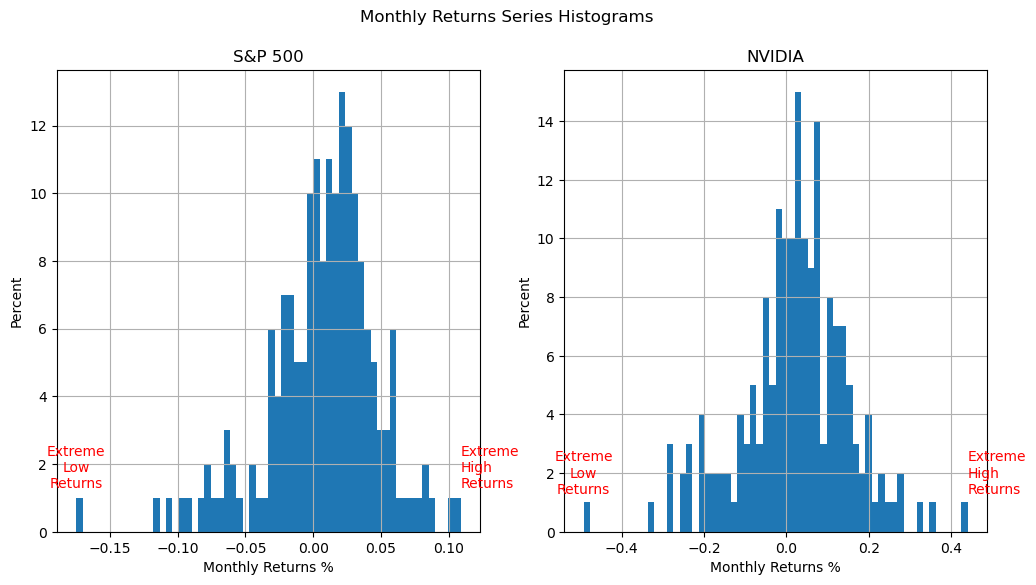

In [9]:
# Histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
mlog_returns2['SPY'].hist(bins=60, ax=axs[0])
mlog_returns2['NVDA'].hist(bins=60, ax=axs[1])

plt.suptitle('Monthly Returns Series Histograms')
axs[0].set_title('S&P 500')
axs[1].set_title('NVIDIA')

for ax in axs:
    ax.set_xlabel('Monthly Returns %')
    ax.set_ylabel('Percent')

axs[0].text(mlog_returns2['SPY'].min(), 1.3, 'Extreme\nLow\nReturns', ha='center', color='red')
axs[0].text(mlog_returns2['SPY'].max(), 1.3, 'Extreme\nHigh\nReturns', color='red')
axs[1].text(mlog_returns2['NVDA'].min(), 1.3, 'Extreme\nLow\nReturns', ha='center', color='red')
axs[1].text(mlog_returns2['NVDA'].max(), 1.3, 'Extreme\nHigh\nReturns', color='red')
    
plt.show()

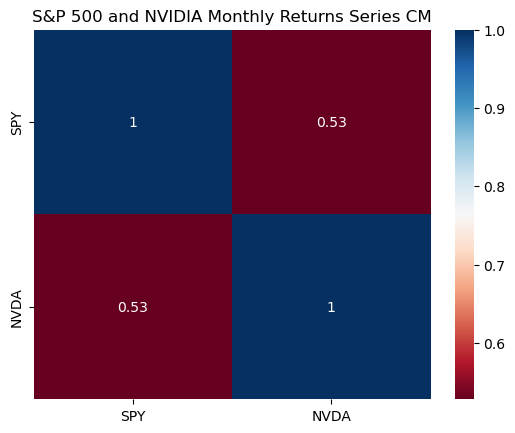


Correlation Coefficient Values


,SPY,NVDA
SPY,1.000000,0.528168
NVDA,0.528168,1.000000


In [10]:
# Correlation matrix
correlation_matrix = mlog_returns2.corr()

seabornInstance.heatmap(correlation_matrix, annot=True, cmap='RdBu')
plt.title('S&P 500 and NVIDIA Monthly Returns Series CM')
plt.show()

print('\nCorrelation Coefficient Values')
correlation_matrix

#### Downloading 3 month TBill rate from Fred. (<b>iv</b>)

In [83]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [100]:
from fredapi import Fred
fred = Fred(api_key='cd33bef0eccbe064b1f3daf1afeba501')

tbill = fred.get_series('TB3MS', '2005-01-01', '2019-12-31')
tbill = pd.DataFrame(tbill, columns=['TB3MS'])

# Converting the rates from percent to decimal, and from annual to monthly
tbill['Monthly_Rate'] = (tbill['TB3MS'] / 100) / 12
tbill

,TB3MS,Monthly_Rate
2005-01-01,2.33,0.001942
2005-02-01,2.54,0.002117
2005-03-01,2.74,0.002283
2005-04-01,2.78,0.002317
2005-05-01,2.84,0.002367
...,...,...
2019-08-01,1.95,0.001625
2019-09-01,1.89,0.001575
2019-10-01,1.65,0.001375
2019-11-01,1.54,0.001283


#### Constructing a matrix of return series combining NVIDIA, S&P500, and TBill for the sample period + constructing a return series with columns of excess returns. (<b>v</b>)

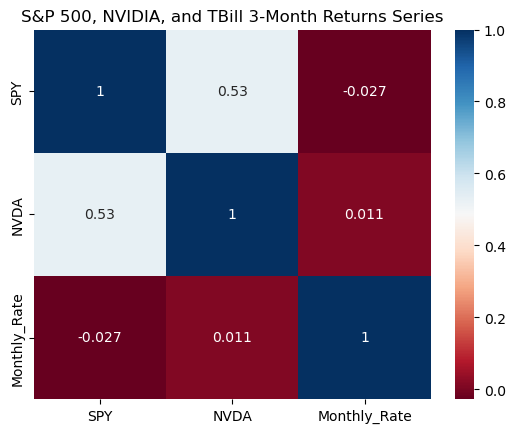


Return Series with Excess Return Columns


,SPY,NVDA,Monthly_Rate,Excess_SPY,Excess_NVDA
2005-02-01,0.020688,0.234939,0.002117,0.018571,0.232823
2005-03-01,-0.022382,-0.198946,0.002283,-0.024665,-0.201229
2005-04-01,-0.014993,-0.080148,0.002317,-0.017310,-0.082465
2005-05-01,0.031717,0.211677,0.002367,0.029350,0.209310
2005-06-01,-0.002514,-0.014119,0.002475,-0.004989,-0.016594
...,...,...,...,...,...
2019-08-01,-0.016885,-0.007197,0.001625,-0.018510,-0.008822
2019-09-01,0.014664,0.039404,0.001575,0.013089,0.037829
2019-10-01,0.026471,0.143947,0.001375,0.025096,0.142572
2019-11-01,0.035559,0.075294,0.001283,0.034275,0.074011


In [133]:
# Combined Return Series
combined_returns = pd.concat([mlog_returns2, tbill['Monthly_Rate']], axis=1).dropna()

# Correlation matrix of Combined Return Series
com_correlation_matrix = combined_returns.corr()

seabornInstance.heatmap(com_correlation_matrix, annot=True, cmap='RdBu')
plt.title('S&P 500, NVIDIA, and TBill 3-Month Returns Series')
plt.show()

# Combined Return Series with Excess Return Columns
combined_returns['Excess_SPY'] = combined_returns['SPY'] - combined_returns['Monthly_Rate']
combined_returns['Excess_NVDA'] = combined_returns['NVDA'] - combined_returns['Monthly_Rate']

print('\nReturn Series with Excess Return Columns')
combined_returns

#### Constructing a linear regression model with the excess returns. (<b>vi</b>)

In [117]:
# Predictor variable
X = combined_returns['Excess_SPY']
# Response variable
y = combined_returns['Excess_NVDA']
# Adding intercept (beta_0)
X1 = sm.add_constant(X)

model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Excess_NVDA   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     68.30
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           3.20e-14
Time:                        19:34:45   Log-Likelihood:                 137.51
No. Observations:                 179   AIC:                            -271.0
Df Residuals:                     177   BIC:                            -264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0079      0.009      0.930      0.354      -0.009       0.025
Excess_SPY     1.7155      0.208      8.265      0.000       1.306       2.125
==============================================================================
Omnibus:                       15.156   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.736
Skew:                          -0.172   Prob(JB):                     3.18e-10
Kurtosis:                       5.397   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Beta for the stock based on the model constructed, testing the null hypothesis, and drawing a conclusion based on p-value. (<b>vii</b>)

#### Beta of the stock from the available stock report + discussing why these two measures are same or different. (<b>viii</b>)

#### Model accuracy: standard error and R-square. (<b>ix</b>)

#### Scatter plot + fitted line for the linear regression model. (<b>x</b>)

#### Interpretation of the analysis: considering return of the stock and S&P 500 and the model constructed. (<b>xi</b>)